In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [11]:
loan_data=pd.read_csv('Loan_data.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_data.shape()

(614, 13)

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Users\Sayali\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


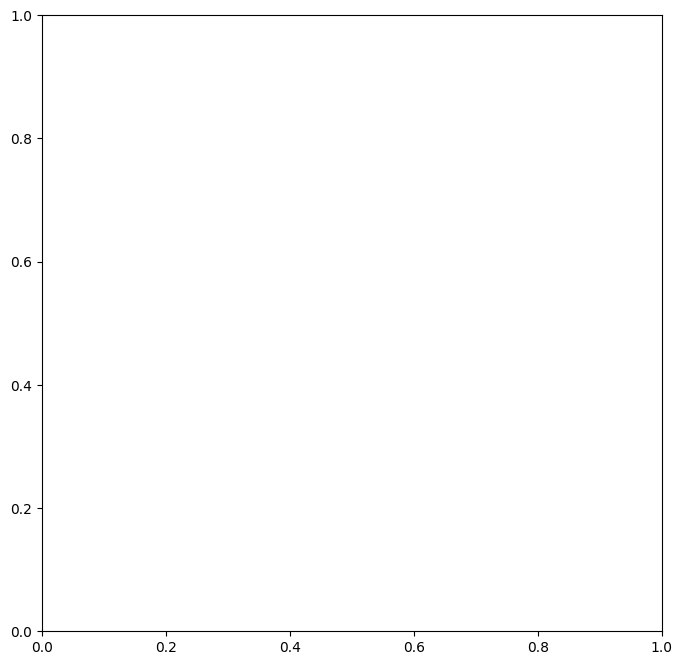

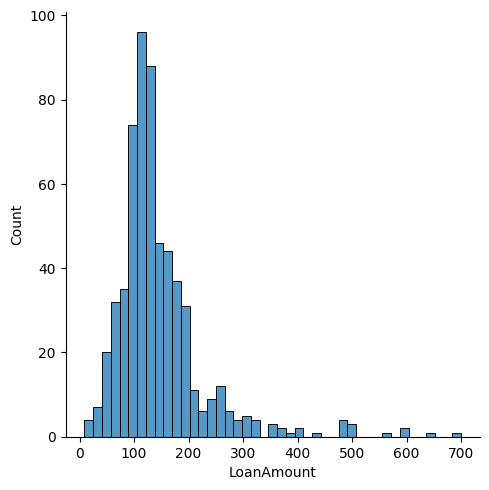

In [24]:
fig, ax= plt.subplots(figsize=(8,8))
sns.displot(loan_data.LoanAmount )

In [27]:
loan_data=loan_data.dropna()

In [28]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
#label encoding
loan_data.replace({"Loan_Status":{"N":0, "Y":1}}, inplace=True)

In [31]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [33]:
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [36]:
loan_data=loan_data.replace(to_replace='3+', value=4)

<Axes: xlabel='Education', ylabel='count'>

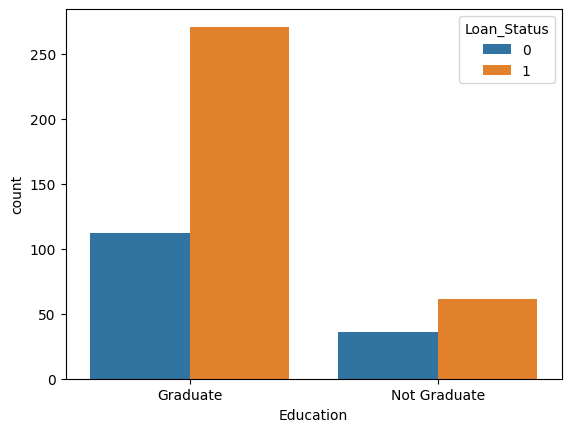

In [37]:
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)

<Axes: xlabel='Married', ylabel='count'>

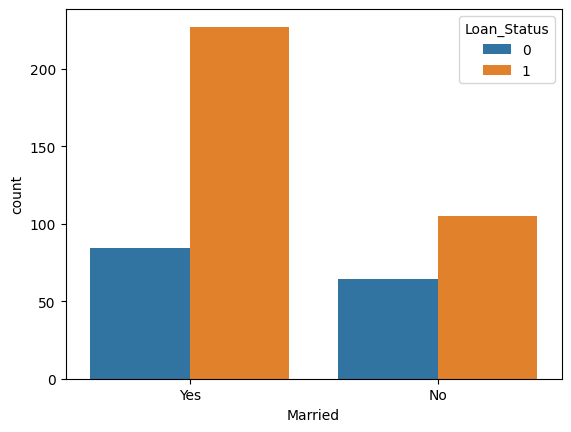

In [39]:
sns.countplot(x='Married', hue='Loan_Status', data=loan_data)

In [44]:
loan_data.replace({"Married":{"No":0, "Yes":1}, "Gender":{"Male": 1, "Female":0}, "Self_Employed":{"No": 0, "Yes":1}, "Property_Area":{"Rural": 0, "Semiurban":1, "Urban":2}, "Education":{"Not Graduate": 0, "Graduate":1}  }, inplace=True)

In [45]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [46]:
X=loan_data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y=loan_data['Loan_Status']

In [47]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [52]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [55]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(480, 11)
(432, 11)
(48, 11)


In [81]:
model=svm.SVC(kernel='linear')

In [82]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [83]:
X_train_prediction=model.predict(X_train) 
train_accuracy=accuracy_score(X_train_prediction, Y_train)

In [84]:
print(train_accuracy)

0.7986111111111112


In [86]:
X_test_prediction=model.predict(X_test) 
test_accuracy=accuracy_score(X_test_prediction, Y_test)

In [87]:
print(test_accuracy)

0.8333333333333334


In [88]:
input_data=(1, 1, 0, 1, 0, 3400, 0, 3000, 1, 1, 0,   )

#change input data to numpy array
input_data_as_np= np.asarray(input_data)

#reshape for one instance
input_data_reshaped= input_data_as_np.reshape(1, -1)

prediction= model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0 ):
    print("The person will not be granted a loan.")
else:
    print("Yes, the person will be be granted a loan.")

[1]
Yes, the person will be be granted a loan.


C:\Users\Sayali\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
